In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfOrig = pd.read_csv('vgsalesOriginal.csv')

<h1>1 Sobre o dataset original do Kaggle</h1>


In [3]:
#df = df.dropna(axis=0)
dfOrig.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Uma diferença entre o dataset original e o que eu gerei rodando o script é que, no original, existe a coluna EU_Sales (não presente no que eu gerei por algum motivo), mas não existem as colunas Critic_Score e User_Score que estão presentes no que eu gerei. Além disso, o dataset original do kaggle contém menos dados mas com menos linhas Nan, porém, muitas delas estão simplesmente zeradas.

In [4]:
dfOrig.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<h3>1.1 Número de linhas NaN na original</h3>

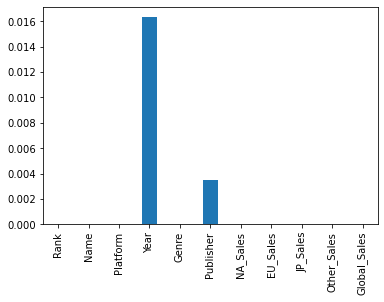

In [5]:
dfNaNOrig = dfOrig.isna().sum()
dfNaNOrig = dfNaNOrig/len(dfOrig)
dfNaNOrig.plot(kind='bar')

In [6]:
dfOrig.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Um número muito pequeno de linhas com NaN, menos de 1,6% das 16598 linhas.

<h3>1.2 Número e porcentagem de linhas iguais a 0.0</h3>

In [7]:
numLinhas = len(dfOrig)
zerosRank = len(dfOrig[dfOrig['Rank'] == 0.0])
zerosNA = len(dfOrig[dfOrig['NA_Sales'] == 0.0])
zerosEU = len(dfOrig[dfOrig['EU_Sales'] == 0.0])
zerosJP = len(dfOrig[dfOrig['JP_Sales'] == 0.0])
zerosOT = len(dfOrig[dfOrig['Other_Sales'] == 0.0])
zerosGB = len(dfOrig[dfOrig['Global_Sales'] == 0.0])
print("Num linhas totais {}".format(numLinhas))
print("Num zeros Rank {}".format(zerosRank))
print("Num zeros NA {}".format(zerosNA))
print("Num zeros EU {}".format(zerosEU))
print("Num zeros JP {}".format(zerosJP))
print("Num zeros OTHER {}".format(zerosOT))
print("Num zeros Global {}".format(zerosGB))

Num linhas totais 16598
Num zeros Rank 0
Num zeros NA 4499
Num zeros EU 5730
Num zeros JP 10455
Num zeros OTHER 6477
Num zeros Global 0


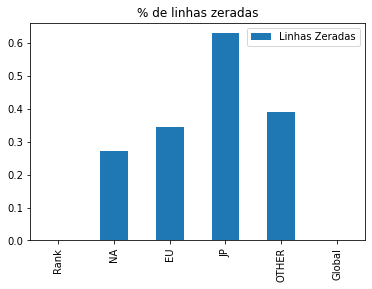

In [8]:
dados = [zerosRank,zerosNA,zerosEU,zerosJP,zerosOT,zerosGB]
for i in range(len(dados)):
    dados[i] = dados[i]/numLinhas
dadosSerie = pd.Series({'Rank':dados[0],'NA':dados[1],'EU':dados[2],'JP':dados[3],'OTHER':dados[4],'Global':dados[5]})

dadosDF = pd.DataFrame({'Linhas Zeradas':dadosSerie})
dadosDF.plot(kind='bar',title="% de linhas zeradas")

Um número bem alto de linhas zeradas (igual a 0.0)

<h1>2 Sobre o dataset que eu gerei</h1>

In [9]:
dfScrape = pd.read_csv('vgsalesScrape.csv')

O Scrape que eu fiz veio sem EU_Sales por algum motivo. Mas veio com duas colunas muito importantes que, inicialmente, permitiriam outras boas análises se conseguíssemos unir os dois datasets: Critic_Score e User_Score.

In [10]:
dfScrape.describe()

,Rank,Year,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
count,58275.000000,54545.000000,6463.000000,384.000000,13515.000000,13862.000000,7593.000000,16184.000000,20088.000000
mean,2724.305174,2006.437070,7.203729,8.055208,0.324791,0.179680,0.173000,0.049941,0.448385
std,2081.394697,9.083153,1.456401,1.667450,0.679112,0.446335,0.408951,0.147471,1.113253
min,11.000000,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1073.000000,2001.000000,6.400000,7.500000,0.050000,0.010000,0.020000,0.000000,0.040000
50%,2299.000000,2008.000000,7.500000,8.500000,0.130000,0.040000,0.050000,0.010000,0.130000
75%,3912.000000,2012.000000,8.300000,9.100000,0.320000,0.160000,0.160000,0.040000,0.410000
max,9229.000000,2079.000000,10.000000,10.000000,26.930000,8.890000,10.220000,7.530000,31.370000


<h3>2.1 Número de linhas NaN</h3>

O número de linhas que estão com NaN é bastante alta com relação ao número de linhas totais. Porém, existem poucas linhas "zeradas". Isso reflete que muitas linhas com NaN nesse dataset estão zeradas no dataset original.

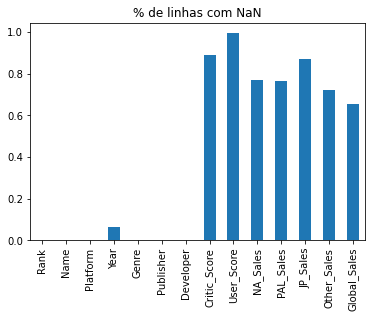

In [11]:
dfNaN = dfScrape.isna().sum()
dfNaN = dfNaN/len(dfScrape)
dfNaN.plot(kind='bar',title="% de linhas com NaN")

índices muito altos de valores NaN em colunas importantes

<h3>2.2 Número e porcentagem de linhas zeradas</h3>

In [12]:
numLinhas = len(dfScrape)
zerosRank = len(dfScrape[dfScrape['Rank'] == 0.0])
zerosNA = len(dfScrape[dfScrape['NA_Sales'] == 0.0])
zerosJP = len(dfScrape[dfScrape['JP_Sales'] == 0.0])
zerosOT = len(dfScrape[dfScrape['Other_Sales'] == 0.0])
zerosGB = len(dfScrape[dfScrape['Global_Sales'] == 0.0])
zerosUS = len(dfScrape[dfScrape['User_Score'] == 0.0])
zerosCS = len(dfScrape[dfScrape['Critic_Score'] == 0.0])
print("Num linhas totais {}".format(numLinhas))
print("Num zeros Rank {}".format(zerosRank))
print("Num zeros NA {}".format(zerosNA))
print("Num zeros JP {}".format(zerosJP))
print("Num zeros OTHER {}".format(zerosOT))
print("Num zeros Global {}".format(zerosGB))
print("Num zeros User Score {}".format(zerosUS))
print("Num zeros Critic Score {}".format(zerosCS))

Num linhas totais 58275
Num zeros Rank 0
Num zeros NA 283
Num zeros JP 423
Num zeros OTHER 5304
Num zeros Global 1377
Num zeros User Score 0
Num zeros Critic Score 0


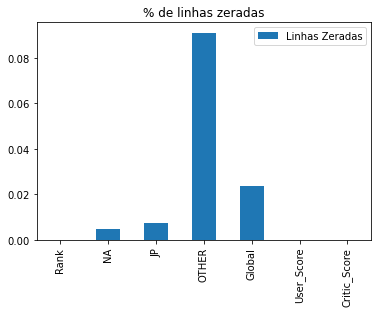

In [13]:
dados = [zerosRank,zerosNA,zerosJP,zerosOT,zerosGB,zerosUS,zerosCS]
for i in range(len(dados)):
    dados[i] = dados[i]/numLinhas
dadosSerie = pd.Series({'Rank':dados[0],'NA':dados[1],'JP':dados[2],'OTHER':dados[3],'Global':dados[4],'User_Score':dados[5],'Critic_Score':dados[6]})

dadosDF = pd.DataFrame({'Linhas Zeradas':dadosSerie})
dadosDF.plot(kind='bar',title="% de linhas zeradas")

No máximo 10% dos dados zerados

No geral, o número de linhas sem informação no dataset que eu gerei é muito grande. Apenas cerca de 10% das linhas de Critic_Score seriam utilizáveis. Já a de User_Score é perto de 100%. Importante lembrar que a proporção de linhas "inúteis" no dataset original é mascarada por terem trocado NaN por 0.0 .  

<h1>3 Alguns Plots MUITO iniciais</h1>
<h2>3.1 Dataset Original</h2>

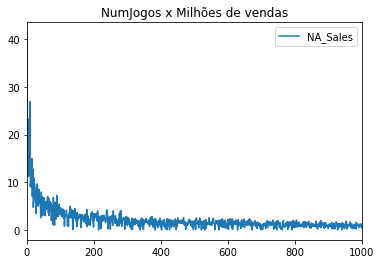

In [92]:
dfOrig.plot.line(y="NA_Sales",xlim=(0,1000),title="NumJogos x Milhões de vendas")

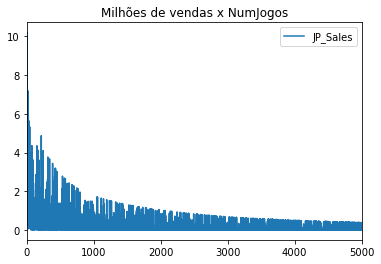

In [97]:
dfOrig.plot.line(y="JP_Sales",xlim=(0,5000),title="Milhões de vendas x NumJogos")

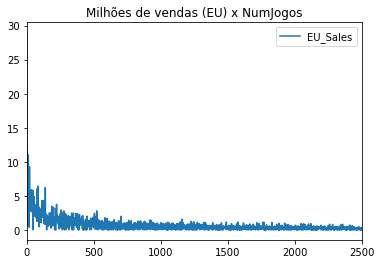

In [100]:
dfOrig.plot.line(y="EU_Sales",xlim=(0,2500),title="Milhões de vendas (EU) x NumJogos")

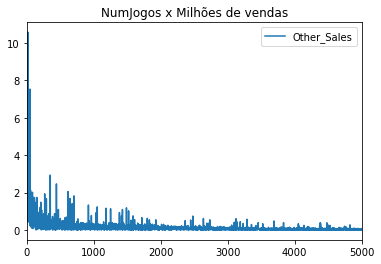

In [101]:
dfOrig.plot.line(y="Other_Sales",xlim=(0,5000),title="NumJogos x Milhões de vendas")

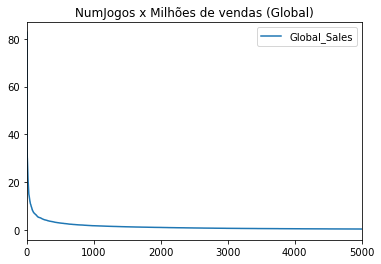

In [103]:
dfOrig.plot.line(y="Global_Sales",xlim=(0,5000),title="NumJogos x Milhões de vendas (Global)")

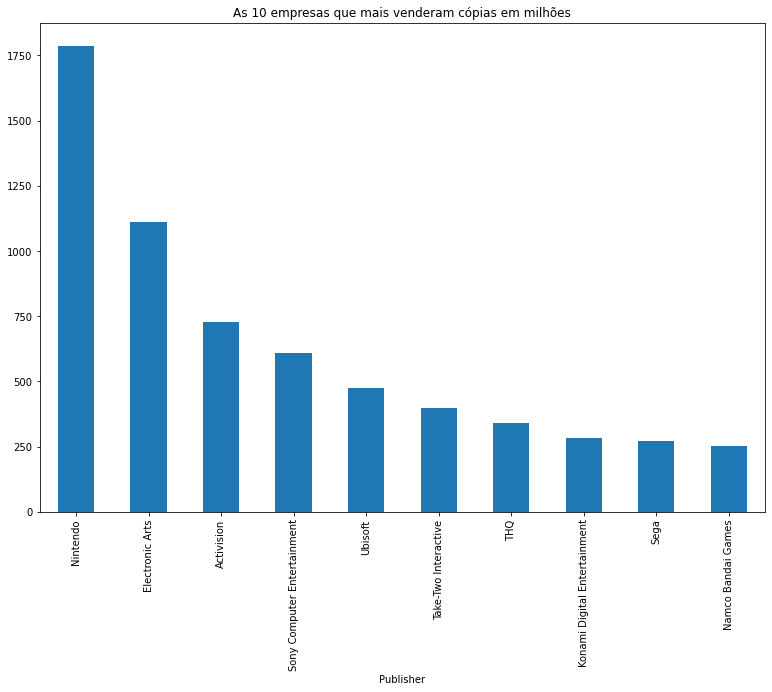

In [49]:
gPub = dfOrig.groupby('Publisher')
gPubSum = gPub.sum()
gPubSum.sort_values(['Global_Sales'],ascending=False)['Global_Sales'].head(10).plot.bar(figsize=(13,9),title='As 10 empresas que mais venderam cópias em milhões')

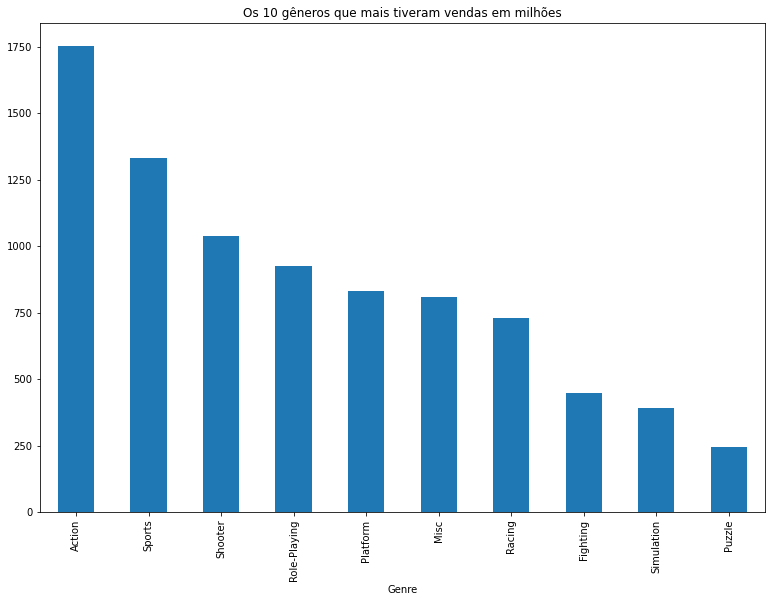

In [52]:
gGenre = dfOrig.groupby('Genre')
gGenreSum = gGenre.sum()
gGenreSum.sort_values(['Global_Sales'],ascending=False)['Global_Sales'].head(10).plot.bar(figsize=(13,9),title='Os 10 gêneros que mais tiveram vendas em milhões')

In [79]:
dfOrig[dfOrig["Name"] == "Grand Theft Auto V"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
1896,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


<h2>3.2 Dataset que eu gerei</h2>

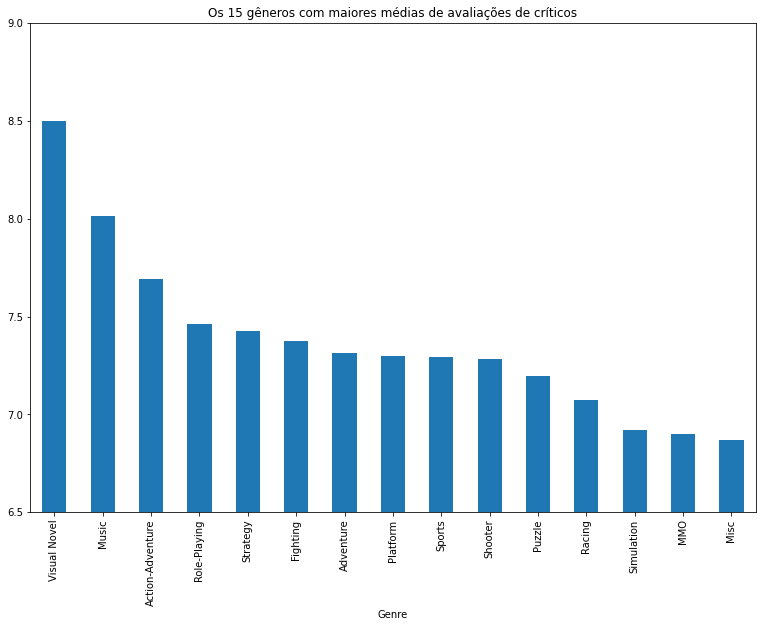

In [82]:
gGenre = dfScrape.groupby('Genre')
gGenreMean = gGenre.mean()
gGenreMean.sort_values(['Critic_Score'],ascending=False)['Critic_Score'].head(15).plot.bar(
    figsize=(13,9),
    ylim=(6.5,9),
    title='Os 15 gêneros com maiores médias de avaliações de críticos')

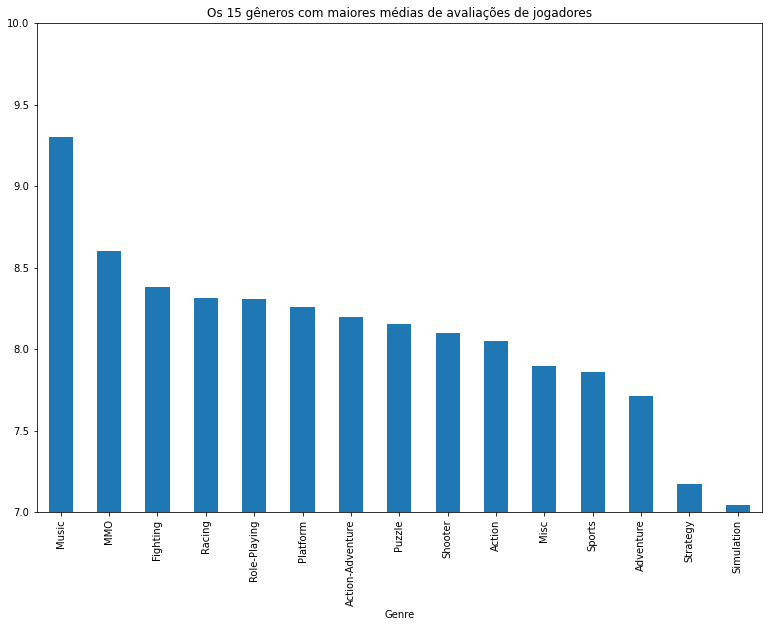

In [68]:
gGenreMean.sort_values(['User_Score'],ascending=False)['User_Score'].head(15).plot.bar(
    figsize=(13,9),
    ylim=(7,10),
    title='Os 15 gêneros com maiores médias de avaliações de jogadores')

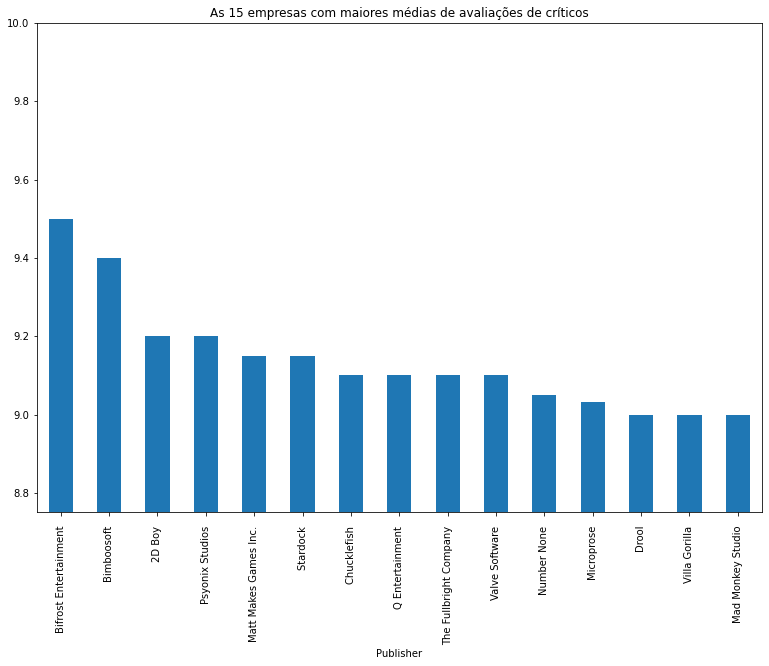

In [70]:
gPub = dfScrape.groupby('Publisher')
gPubMean = gPub.mean()
gPubMean.sort_values(['Critic_Score'],ascending=False)['Critic_Score'].head(15).plot.bar(
    figsize=(13,9),
    ylim=(8.75,10),
    title='As 15 empresas com maiores médias de avaliações de críticos')

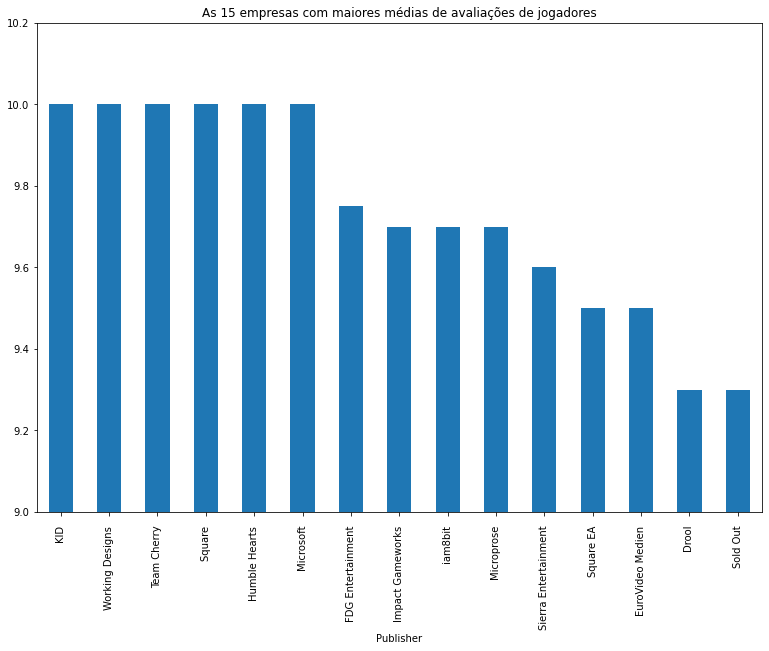

In [76]:
gPubMean.sort_values(['User_Score'],ascending=False)['User_Score'].head(15).plot.bar(
    figsize=(13,9),
    ylim=(9,10.2),
    title='As 15 empresas com maiores médias de avaliações de jogadores')

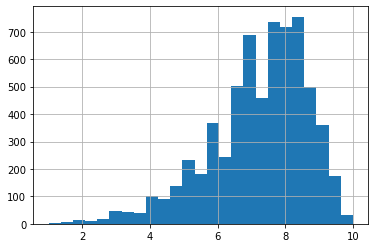

In [78]:
dfScrape["Critic_Score"].hist(bins=25)

In [61]:
dfScrape[dfScrape["Critic_Score"] == 10.0]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
341,14,Grand Theft Auto IV,X360,2008.0,Action,Rockstar Games,Rockstar North,10.0,NaN,6.80,3.11,0.14,1.04,11.09
343,16,Grand Theft Auto IV,PS3,2008.0,Action,Rockstar Games,Rockstar North,10.0,9.0,4.79,3.73,0.44,1.62,10.57
566,239,Final Fight,SNES,1991.0,Action,Capcom,Capcom,10.0,NaN,0.67,0.17,0.69,0.03,1.56
641,314,Red Dead Redemption: Undead Nightmare,PS3,2010.0,Action,Rockstar Games,Rockstar San Diego,10.0,NaN,0.47,0.45,0.06,0.19,1.18
665,338,Red Dead Redemption: Undead Nightmare,X360,2010.0,Action,Rockstar Games,Rockstar San Diego,10.0,NaN,0.61,0.38,0.02,0.10,1.11
8423,170,The Legend of Zelda: Breath of the Wild,WiiU,2017.0,Action-Adventure,Nintendo,Nintendo EPD,10.0,10.0,0.66,0.42,0.15,0.11,1.34
11588,1775,The gamrReview Test Game,NES,1994.0,Fighting,Unknown,VGChartz,10.0,NaN,NaN,NaN,NaN,NaN,NaN
24858,13,The Legend of Zelda: A Link to the Past,SNES,1992.0,Adventure,Nintendo,Nintendo EAD,10.0,NaN,2.42,0.91,1.15,0.13,4.61
29375,4570,The Legend of Zelda Collector's Edition,GC,2003.0,Adventure,Nintendo,Nintendo Software Technology Corporation,10.0,10.0,NaN,NaN,NaN,NaN,NaN
33662,21,Super Mario Kart,SNES,1992.0,Racing,Nintendo,Nintendo EAD,10.0,NaN,3.54,1.24,3.81,0.18,8.76


In [63]:
dfScrape[dfScrape["Name"] == "Grand Theft Auto V"]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
338,11,Grand Theft Auto V,X360,2013.0,Action,Rockstar Games,Rockstar North,NaN,NaN,9.06,5.33,0.06,1.42,15.86
340,13,Grand Theft Auto V,PC,2015.0,Action,Rockstar Games,Rockstar North,NaN,NaN,0.48,0.76,NaN,0.10,1.33
346,19,Grand Theft Auto V,XOne,2014.0,Action,Rockstar Games,Rockstar North,9.0,9.0,4.70,3.25,0.01,0.76,8.72
9058,805,Grand Theft Auto V,XS,2021.0,Action-Adventure,Rockstar Games,Rockstar Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9059,806,Grand Theft Auto V,PS5,2021.0,Action-Adventure,Rockstar Games,Rockstar Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN
